In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
source_path = "../../Result"
file_name = "time.csv"

In [50]:
# Load CSV file as pandas DataFrame
df = pd.read_csv(os.path.join(source_path, file_name))

In [51]:
# Iterate over the 'Age' column and extract data
df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
for filename in df['ccl_grana_filename']:
    new_name = filename.replace("..\\ccl_data\\jpg_files\\","")
    name_list = new_name.split('\\')
    prop_list = name_list[2].split('=')
    node_number = prop_list[1].replace('d','')
    degree = prop_list[2].split("_")[0]
    ccl_grana = df.loc[df['ccl_grana_filename'] == filename, 'ccl_grana_processing_time(ms)'].values[0]
    ccl_wu = df.loc[df['ccl_grana_filename'] == filename, 'ccl_wu_processing_time(ms)'].values[0]
    ct = df.loc[df['ccl_grana_filename'] == filename, 'findContours_processing_time(ms)'].values[0]
    df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, ccl_grana, ccl_wu, ct]



In [91]:
df_result

,Type,FD_Algorithm,Nodes_Number,Degree,CCL_Grana_Time,CCL_Wu_Time,CT_Time
0,Sparse,DH,1000,10,188496,177555,164618
1,Sparse,DH,1000,12,135636,200468,190522
2,Sparse,DH,1000,15,140624,186010,217418
3,Sparse,DH,1000,6,169545,213428,171541
4,Sparse,DH,1000,8,170543,270214,195317
...,...,...,...,...,...,...,...
395,Uniform,LINLOG,500,10,57844,46864,77792
396,Uniform,LINLOG,500,12,68816,46864,129652
397,Uniform,LINLOG,500,15,57844,46860,41890
398,Uniform,LINLOG,500,6,40891,46835,36903


In [59]:
temp

,Type,Degree,CCL_Grana_Time,CCL_Wu_Time,CT_Time
0,Sparse,10,188496,177555,164618
1,Sparse,12,135636,200468,190522
2,Sparse,15,140624,186010,217418
3,Sparse,6,169545,213428,171541
4,Sparse,8,170543,270214,195317
200,Uniform,10,153073,244346,140985
201,Uniform,12,136669,242350,135160
202,Uniform,15,179224,203456,118681
203,Uniform,6,156102,172538,96946
204,Uniform,8,156628,179685,130747


In [63]:
temp.loc[(temp['Degree'] == '6') & (temp['Type'] == 'Sparse'), 'CCL_Grana_Time']

3    169545
Name: CCL_Grana_Time, dtype: object

In [85]:
def drawGraphWithSameDegree(_type, FD, degree):
    df_FD_SameDegree = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
    temp = df_result.loc\
            [(df_result['FD_Algorithm'] == FD) & \
             (df_result['Degree'] == degree), \
             ['Type','Nodes_Number', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time']]

    degree_value = [500, 1000, 2000, 3000]
    ccl_grana_sparse_list = []
    ccl_wu_sparse_list = []
    ct_sparse_list = []
    for value in degree_value:
        ccl_grana_sparse_list.append(temp.loc[(temp['Nodes_Number'] == str(value)) & (temp['Type'] == _type), 'CCL_Grana_Time'].values[0])
        ccl_wu_sparse_list.append(temp.loc[(temp['Nodes_Number'] == str(value)) & (temp['Type'] == _type), 'CCL_Wu_Time'].values[0])
        ct_sparse_list.append(temp.loc[(temp['Nodes_Number'] == str(value)) & (temp['Type'] == _type), 'CT_Time'].values[0])
    # Generate data for the first curve
    # x1 = np.linspace(6, 15, 5)
    y1 = ccl_grana_sparse_list
    # Generate data for the second curve
    # x2 = np.linspace(6, 15, 5)
    y2 = ccl_wu_sparse_list
    # x3 = np.linspace(6, 15, 5)
    y3 = ct_sparse_list

    # Plot the curves
    plt.plot(degree_value, y1, label='CCL_Grana')
    plt.plot(degree_value, y2, label='CCL_Wu')
    plt.plot(degree_value, y3, label='CT')

    # Add a title and legend
    plt.title('Type=' + _type + ' FD=' + FD + ' D=' + degree)
    plt.legend()

    # Show the chart
    plt.show()

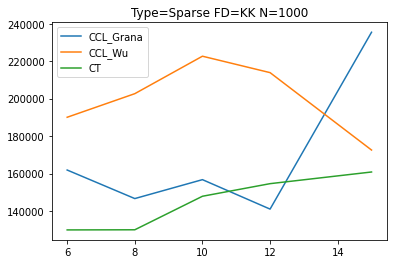

In [92]:
drawGraphWithSameDegree('Sparse', 'KK', '1000')

In [ ]:
def drawGraphWithSameNodes(_type, FD, nodes_number):
    df_FD_SameDegree = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
    temp = df_result.loc\
            [(df_result['FD_Algorithm'] == FD) & \
             (df_result['Nodes_Number'] == nodes_number), \
             ['Type','Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time']]

    degree_value = [6, 8, 10, 12, 15]
    ccl_grana_sparse_list = []
    ccl_wu_sparse_list = []
    ct_sparse_list = []
    for value in degree_value:
        ccl_grana_sparse_list.append(temp.loc[(temp['Degree'] == str(value)) & (temp['Type'] == _type), 'CCL_Grana_Time'].values[0])
        ccl_wu_sparse_list.append(temp.loc[(temp['Degree'] == str(value)) & (temp['Type'] == _type), 'CCL_Wu_Time'].values[0])
        ct_sparse_list.append(temp.loc[(temp['Degree'] == str(value)) & (temp['Type'] == _type), 'CT_Time'].values[0])
    # Generate data for the first curve
    # x1 = np.linspace(6, 15, 5)
    y1 = ccl_grana_sparse_list
    # Generate data for the second curve
    # x2 = np.linspace(6, 15, 5)
    y2 = ccl_wu_sparse_list
    # x3 = np.linspace(6, 15, 5)
    y3 = ct_sparse_list

    # Plot the curves
    plt.plot(degree_value, y1, label='CCL_Grana')
    plt.plot(degree_value, y2, label='CCL_Wu')
    plt.plot(degree_value, y3, label='CT')

    # Add a title and legend
    plt.title('Type=' + _type + ' FD=' + FD + ' N=' + nodes_number)
    plt.legend()

    # Show the chart
    plt.show()

In [64]:
df_FD_SameDegree = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
df_FD_SameNode = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
temp = df_result.loc\
        [(df_result['FD_Algorithm'] == 'DH') & \
         (df_result['Nodes_Number'] == '1000'), \
         ['Type','Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time']]

degree_value = [6, 8, 10, 12, 15]
ccl_grana_sparse_list = []
ccl_wu_sparse_list = []
ct_sparse_list = []
for value in degree_value:
    ccl_grana_sparse_list.append(temp.loc[(temp['Degree'] == str(value)) & (temp['Type'] == 'Sparse'), 'CCL_Grana_Time'].values[0])
    ccl_wu_sparse_list.append(temp.loc[(temp['Degree'] == str(value)) & (temp['Type'] == 'Sparse'), 'CCL_Wu_Time'].values[0])
    ct_sparse_list.append(temp.loc[(temp['Degree'] == str(value)) & (temp['Type'] == 'Sparse'), 'CT_Time'].values[0])

In [65]:
ccl_grana_sparse_list

[169545, 170543, 188496, 135636, 140624]

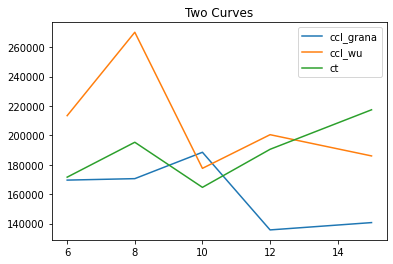

In [75]:
# Generate data for the first curve
# x1 = np.linspace(6, 15, 5)
y1 = ccl_grana_sparse_list

# Generate data for the second curve
# x2 = np.linspace(6, 15, 5)
y2 = ccl_wu_sparse_list

# x3 = np.linspace(6, 15, 5)
y3 = ct_sparse_list

# Plot the curves
plt.plot(degree_value, y1, label='ccl_grana')
plt.plot(degree_value, y2, label='ccl_wu')
plt.plot(degree_value, y3, label='ct')

# Add a title and legend
plt.title('Two Curves')
plt.legend()

# Show the chart
plt.show()
